In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Test set

In [42]:
test= pd.read_csv('final_test_feature.csv',parse_dates=['click_time'])

In [43]:
test.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,...,ip_nunique_channel,ip_nunique_app,ip_nunique_hour,ip_app_nunique_os,ip_nunique_device,app_nunique_channel,ip_device_os_nunique_app,ip_device_os_cumcount_app,ip_cumcount_app,ip_cumcount_os
0,48240,23,1,13,153,2017-11-08,NaN,0,8,0,...,81,31,1,9,4,4,19,0,0,0
1,45702,13,1,16,477,2017-11-08,NaN,0,8,0,...,46,18,1,2,2,7,7,0,0,0
2,123214,12,1,13,259,2017-11-08,NaN,0,8,0,...,25,11,1,4,1,28,9,0,0,0
3,98052,15,1,19,265,2017-11-08,NaN,0,8,0,...,58,20,1,6,2,25,17,0,0,0
4,97903,6,1,18,125,2017-11-08,NaN,0,8,0,...,42,19,1,1,1,5,8,0,0,0


In [44]:
ratio = 10
pos_df = test[test['is_attributed']==1]
neg_df = test[test['is_attributed']==0]
reduced_neg_df = neg_df.sample(ratio*len(pos_df), random_state=100)
down_test = pd.concat([pos_df]+[reduced_neg_df], ignore_index=True)

In [45]:
col_names=test.columns.tolist()
print(col_names)

['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time', 'is_attributed', 'day', 'hour', 'minute', 'second', 'ip_tcount', 'ip_app_count', 'ip_app_os_count', 'ip_h_chan_var', 'ip_app_os_var', 'ip_app_channel_mean_hour', 'ip_rate', 'app_rate', 'device_rate', 'os_rate', 'channel_rate', 'app_channel_rate', 'app_os_rate', 'app_device_rate', 'os_channel_rate', 'device_channel_rate', 'device_os_rate', 'ip_nextClick', 'ip_app_nextClick', 'ip_channel_nextClick', 'ip_os_nextClick', 'ip_os_device_nextClick', 'ip_os_device_app_nextClick', 'prev_identical_clicks', 'future_identical_clicks', 'prev_app_clicks', 'future_app_clicks', 'ip_nunique_channel', 'ip_nunique_app', 'ip_nunique_hour', 'ip_app_nunique_os', 'ip_nunique_device', 'app_nunique_channel', 'ip_device_os_nunique_app', 'ip_device_os_cumcount_app', 'ip_cumcount_app', 'ip_cumcount_os']


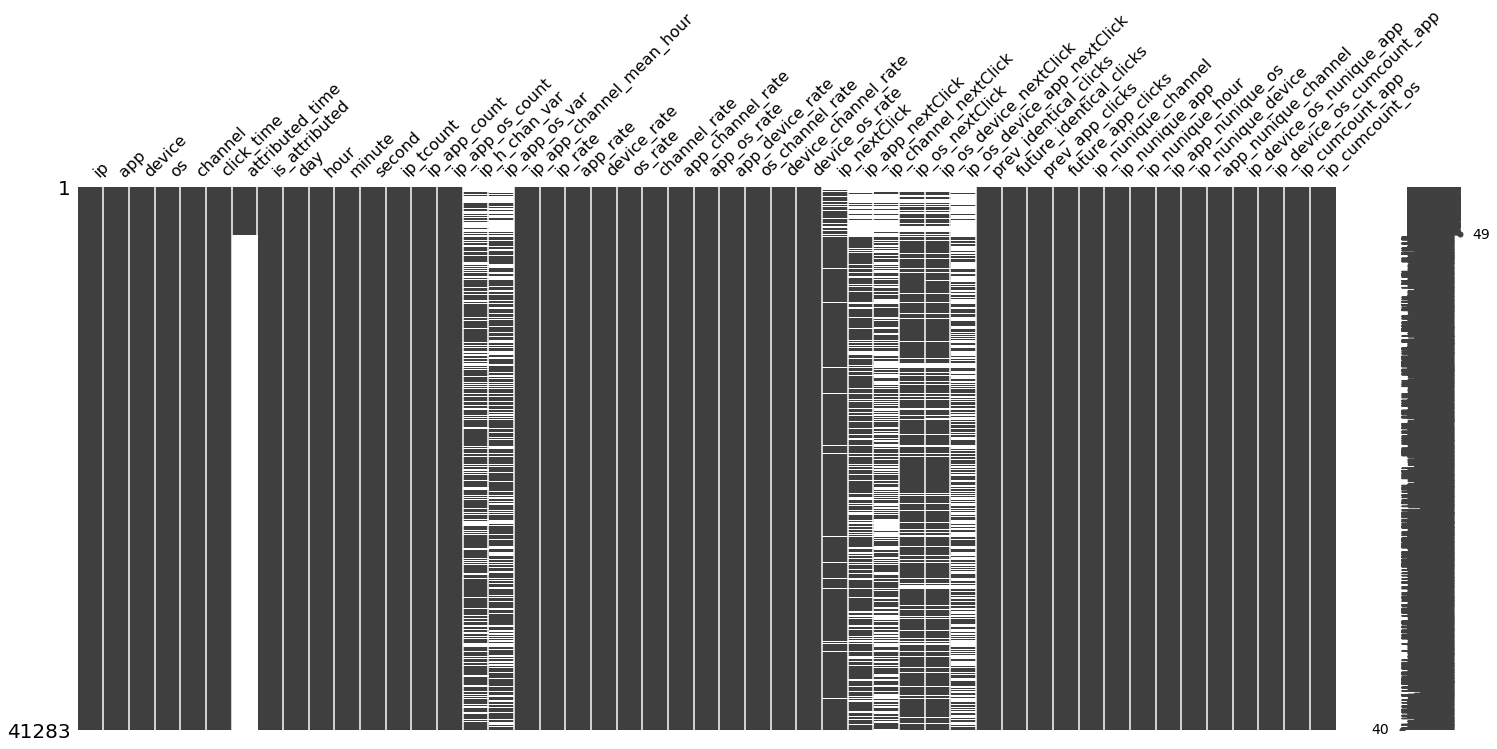

In [46]:
import missingno as msno
%matplotlib inline
msno.matrix(down_test)

In [47]:
col_names=['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time', 'is_attributed', 'day', 'hour', 'minute', 'second', 'ip_tcount', 'ip_app_count', 'ip_app_os_count', 'ip_h_chan_var', 'ip_app_os_var', 'ip_app_channel_mean_hour', 'ip_rate', 'app_rate', 'device_rate', 'os_rate', 'channel_rate', 'app_channel_rate', 'app_os_rate', 'app_device_rate', 'os_channel_rate', 'device_channel_rate', 'device_os_rate', 'ip_nextClick', 'ip_app_nextClick', 'ip_channel_nextClick', 'ip_os_nextClick', 'ip_os_device_nextClick', 'ip_os_device_app_nextClick', 'prev_identical_clicks', 'future_identical_clicks', 'prev_app_clicks', 'future_app_clicks', 'ip_nunique_channel', 'ip_nunique_app', 'ip_nunique_hour', 'ip_app_nunique_os', 'ip_nunique_device', 'app_nunique_channel', 'ip_device_os_nunique_app', 'ip_device_os_cumcount_app', 'ip_cumcount_app', 'ip_cumcount_os']

In [48]:
v2=['ip_rate','device_rate','os_rate', 'app_channel_rate','app_os_rate','ip_nunique_app', 'app_device_rate','ip_nextClick','channel_rate','ip_device_os_cumcount_app','os_channel_rate','ip_tcount','ip_device_os_nunique_app','ip_app_count','ip_app_nextClick','ip_os_device_nextClick','ip_nunique_device','hour']

In [49]:
v3=['ip', 'app', 'device', 'os', 'channel','day', 'hour', 'minute', 'second', 'ip_tcount', 'ip_app_count', 'ip_app_os_count', 'ip_h_chan_var', 'ip_app_os_var', 'ip_app_channel_mean_hour', 'ip_rate', 'app_rate', 'device_rate', 'os_rate', 'channel_rate', 'app_channel_rate', 'app_os_rate', 'app_device_rate', 'os_channel_rate', 'device_channel_rate', 'device_os_rate', 'ip_nextClick', 'ip_app_nextClick', 'ip_channel_nextClick', 'ip_os_nextClick', 'ip_os_device_nextClick', 'ip_os_device_app_nextClick', 'prev_identical_clicks', 'future_identical_clicks', 'prev_app_clicks', 'future_app_clicks', 'ip_nunique_channel', 'ip_nunique_app', 'ip_nunique_hour', 'ip_app_nunique_os', 'ip_nunique_device', 'app_nunique_channel', 'ip_device_os_nunique_app', 'ip_device_os_cumcount_app', 'ip_cumcount_app', 'ip_cumcount_os']

In [50]:
v4=['ip', 'app', 'device', 'os', 'channel',    'day', 'hour', 'minute', 'second', 'ip_tcount', 'ip_app_count', 'ip_app_os_count', 'ip_h_chan_var', 'ip_app_os_var', 'ip_app_channel_mean_hour', 'ip_rate', 'app_rate', 'device_rate', 'os_rate', 'channel_rate', 'app_channel_rate', 'app_os_rate', 'app_device_rate', 'os_channel_rate', 'device_channel_rate', 'device_os_rate', 'ip_nextClick', 'ip_app_nextClick', 'ip_channel_nextClick', 'ip_os_nextClick', 'ip_os_device_nextClick', 'ip_os_device_app_nextClick', 'prev_identical_clicks', 'future_identical_clicks', 'prev_app_clicks', 'future_app_clicks', 'ip_nunique_channel', 'ip_nunique_app', 'ip_nunique_hour', 'ip_app_nunique_os', 'ip_nunique_device', 'app_nunique_channel', 'ip_device_os_nunique_app', 'ip_device_os_cumcount_app', 'ip_cumcount_app', 'ip_cumcount_os']

In [51]:
v5=['ip_device_os_cumcount_app','ip_app_count','ip_nextClick','ip_tcount','app','ip_nunique_device','ip_os_nextClick','ip_nunique_channel','ip_nunique_app','ip_channel_nextClick','future_app_clicks']

In [52]:
v6=['ip', 'app', 'device', 'os', 'channel','day', 'hour', 'minute', 'second', 'ip_tcount', 'ip_app_count', 'ip_app_os_count', 'ip_h_chan_var', 'ip_app_os_var', 'ip_app_channel_mean_hour',  'ip_nextClick', 'ip_app_nextClick', 'ip_channel_nextClick', 'ip_os_nextClick', 'ip_os_device_nextClick', 'ip_os_device_app_nextClick', 'prev_identical_clicks', 'future_identical_clicks', 'prev_app_clicks', 'future_app_clicks', 'ip_nunique_channel', 'ip_nunique_app', 'ip_nunique_hour', 'ip_app_nunique_os', 'ip_nunique_device', 'app_nunique_channel', 'ip_device_os_nunique_app', 'ip_device_os_cumcount_app', 'ip_cumcount_app', 'ip_cumcount_os']

In [53]:
v7=['ip', 'app', 'device', 'os', 'channel','day', 'hour', 'minute', 'second', 'ip_tcount', 'ip_app_count', 'ip_app_os_count', 'ip_h_chan_var', 'ip_app_os_var', 'ip_app_channel_mean_hour',  'ip_nextClick', 'ip_app_nextClick', 'ip_channel_nextClick', 'ip_os_nextClick', 'ip_os_device_nextClick', 'ip_os_device_app_nextClick', 'prev_identical_clicks', 'future_identical_clicks', 'prev_app_clicks', 'future_app_clicks', 'ip_nunique_channel', 'ip_nunique_app', 'ip_nunique_hour', 'ip_app_nunique_os', 'ip_nunique_device', 'app_nunique_channel', 'ip_device_os_nunique_app', 'ip_device_os_cumcount_app', 'ip_cumcount_app', 'ip_cumcount_os']

In [54]:
down_test=down_test[col_names]

In [55]:
down_test.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,...,ip_nunique_channel,ip_nunique_app,ip_nunique_hour,ip_app_nunique_os,ip_nunique_device,app_nunique_channel,ip_device_os_nunique_app,ip_device_os_cumcount_app,ip_cumcount_app,ip_cumcount_os
0,228723,19,78,0,333,2017-11-08 00:00:00,2017-11-08 01:10:17,1,8,0,...,1,1,1,1,1,8,1,0,0,0
1,215683,108,1,13,243,2017-11-08 00:00:01,2017-11-08 00:02:56,1,8,0,...,1,1,1,1,1,2,1,0,0,0
2,73065,18,1,18,121,2017-11-08 00:00:02,2017-11-08 00:39:54,1,8,0,...,65,23,1,10,1,11,6,0,1,1
3,266492,9,1,19,466,2017-11-08 00:00:02,2017-11-08 03:32:07,1,8,0,...,7,7,1,1,1,29,6,1,1,1
4,76802,19,1016,38,213,2017-11-08 00:00:03,2017-11-08 01:59:36,1,8,0,...,23,13,1,1,2,8,1,0,0,0


In [56]:
down_test=down_test.fillna(value=0)

In [57]:
col_names_x=['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time', 'day', 'hour', 'minute', 'second', 'ip_tcount', 'ip_app_count', 'ip_app_os_count', 'ip_h_chan_var', 'ip_app_os_var', 'ip_app_channel_mean_hour', 'ip_rate', 'app_rate', 'device_rate', 'os_rate', 'channel_rate', 'app_channel_rate', 'app_os_rate', 'app_device_rate', 'os_channel_rate', 'device_channel_rate', 'device_os_rate', 'ip_nextClick', 'ip_app_nextClick', 'ip_channel_nextClick', 'ip_os_nextClick', 'ip_os_device_nextClick', 'ip_os_device_app_nextClick', 'prev_identical_clicks', 'future_identical_clicks', 'prev_app_clicks', 'future_app_clicks', 'ip_nunique_channel', 'ip_nunique_app', 'ip_nunique_hour', 'ip_app_nunique_os', 'ip_nunique_device', 'app_nunique_channel', 'ip_device_os_nunique_app', 'ip_device_os_cumcount_app', 'ip_cumcount_app', 'ip_cumcount_os']

## LR (v2/v5)  / RF(V6/V3)

In [58]:
X_val = down_test[v2].copy()
y_val = down_test['is_attributed'].values

In [59]:
train= pd.read_csv('final_feature_train.csv',parse_dates=['click_time'])

In [60]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,...,ip_nunique_channel,ip_nunique_app,ip_nunique_hour,ip_app_nunique_os,ip_nunique_device,app_nunique_channel,ip_device_os_nunique_app,ip_device_os_cumcount_app,ip_cumcount_app,ip_cumcount_os
0,70712,2,1,32,237,2017-11-07,0,0,7,0,...,54,21,3,22,2,20,1,0,0,0
1,45892,3,1,25,424,2017-11-07,0,0,7,0,...,88,34,3,25,3,38,20,0,0,0
2,37774,8,2,13,145,2017-11-07,0,0,7,0,...,92,35,3,8,4,3,8,0,0,0
3,41179,2,1,13,122,2017-11-07,0,0,7,0,...,51,22,3,5,3,20,6,0,0,0
4,83111,15,1,8,245,2017-11-07,0,0,7,0,...,75,26,3,10,3,27,2,0,0,0


In [61]:
train.shape

(10000000, 49)

In [62]:
ratio = 10
pos_df = train[train['is_attributed']==1]
neg_df = train[train['is_attributed']==0]
reduced_neg_df = neg_df.sample(ratio*len(pos_df), random_state=100)
down_train = pd.concat([pos_df]+[reduced_neg_df], ignore_index=True)

In [63]:
down_train=down_train.fillna(value=0)

In [64]:
#down_train=down_train[col_names]

In [65]:
X_train = down_train[v2].copy()
y_train = down_train['is_attributed'].values

In [66]:
X_train.head()

,ip_rate,device_rate,os_rate,app_channel_rate,app_os_rate,ip_nunique_app,app_device_rate,ip_nextClick,channel_rate,ip_device_os_cumcount_app,os_channel_rate,ip_tcount,ip_device_os_nunique_app,ip_app_count,ip_app_nextClick,ip_os_device_nextClick,ip_nunique_device,hour
0,0.005650,0.002517,0.002845,0.940713,0.900098,20,0.811841,21.0,0.591213,0,0.588235,55,12,1,0.0,139.0,1,0
1,0.011111,0.002517,0.002845,0.940713,0.900098,19,0.811841,1419.0,0.591213,0,0.588235,34,11,1,0.0,1419.0,1,0
2,0.002400,0.002517,0.002845,0.168763,0.291946,45,0.243616,1.0,0.108494,0,0.118513,2133,31,1,0.0,60.0,5,0
3,0.006536,0.002517,0.002999,0.776282,0.953445,18,0.811841,449.0,0.392079,0,0.503327,43,15,1,0.0,1792.0,2,0
4,0.005479,0.002517,0.001544,0.001314,0.001309,24,0.001600,4.0,0.001314,0,0.001619,126,4,30,58.0,4.0,2,0


In [67]:
from sklearn import preprocessing

In [68]:
minmax_scale = preprocessing.MinMaxScaler().fit(X_train)
X_train = minmax_scale.transform(X_train)

In [69]:
minmax_scale = preprocessing.MinMaxScaler().fit(X_val)
X_val = minmax_scale.transform(X_val)

In [70]:
v_2=['ip_rate','device_rate','os_rate', 'app_channel_rate','app_os_rate','channel_rate','os_channel_rate']

In [71]:
v_3=['ip_rate','app_rate','app_device_rate', 'os_channel_rate', 'app_os_rate','device_os_rate','device_channel_rate', 'app_channel_rate']

In [72]:
from pandas import DataFrame

In [73]:
X_val= DataFrame(X_val, columns=v2)

In [74]:
X_val.loc[:,v_2]=0

In [75]:
X_val.head()

,ip_rate,device_rate,os_rate,app_channel_rate,app_os_rate,ip_nunique_app,app_device_rate,ip_nextClick,channel_rate,ip_device_os_cumcount_app,os_channel_rate,ip_tcount,ip_device_os_nunique_app,ip_app_count,ip_app_nextClick,ip_os_device_nextClick,ip_nunique_device,hour
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.222222,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.448276,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.360656,0.000433,0.000546,0.0,0.000000,0.0,0.016785,0.151515,0.006908,0.046287,0.000506,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.098361,0.001266,0.000000,0.0,0.000303,0.0,0.000541,0.151515,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.196721,1.000000,0.151913,0.0,0.000000,0.0,0.002166,0.000000,0.000000,0.000000,0.000000,0.066667,0.0


In [76]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [77]:
def plot_roc(y_val, y_val_proba):
    fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
    f, axes = plt.subplots(1, figsize=(8, 5))
    lab = 'AUC=%.5f' % auc(fpr, tpr)
    axes.step(fpr, tpr, lw=2,label=lab)
    axes.legend(loc='lower right', fontsize='small')
    #plt.title("The AUC of CVR  (V8)")
    plt.show()

In [78]:
from __future__ import print_function, division
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [79]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, mean_squared_error

In [80]:
from lightgbm import LGBMClassifier
from sklearn.cross_validation import KFold

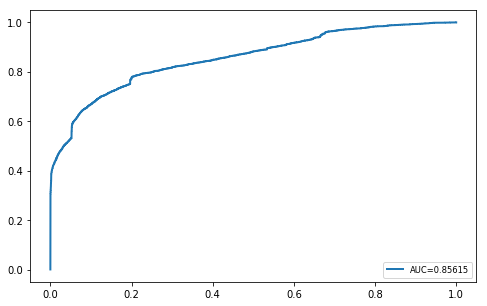

             precision    recall  f1-score   support

          0       0.93      1.00      0.97     37530
          1       1.00      0.30      0.46      3753

avg / total       0.94      0.94      0.92     41283



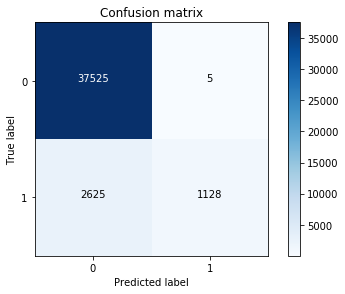

cross entropy loss:  0.24660169953936323


In [81]:
import itertools
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf = LogisticRegression()
#rf=RandomForestClassifier()
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)
y_val_proba = clf.predict_proba(X_val)[:, 1]
plot_roc(y_val, y_val_proba)
print(classification_report(y_val, y_val_pred))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val, y_val_pred)
np.set_printoptions(precision=2)

#print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]

plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
print("cross entropy loss: ",log_loss(y_val,y_val_proba))

## XGBoost

In [90]:
import xgboost as xgb

# Split into X and y
y = y_train
X = X_train

# Create a model
# Params from: https://www.kaggle.com/aharless/swetha-s-xgboost-revised
clf_xgBoost = xgb.XGBClassifier(
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    colsample_bylevel = 0.7,
    scale_pos_weight = 9,
    min_child_weight = 0,
    reg_alpha = 4,
    n_jobs = 4, 
    objective = 'binary:logistic'
)
# Fit the models
clf_xgBoost.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=0, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=4, reg_lambda=1, scale_pos_weight=9, seed=None,
       silent=True, subsample=0.8)

In [ ]:
import itertools
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf_xgBoost.fit(X, y)
y_val_pred = clf.predict(X_val)
y_val_proba = clf.predict_proba(X_val)[:, 1]
plot_roc(y_val, y_val_proba)
print(classification_report(y_val, y_val_pred))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val, y_val_pred)
np.set_printoptions(precision=2)

#print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]

plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
print("cross entropy loss: ",log_loss(y_val,y_val_proba))

## VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier

clf = VotingClassifier([('LR', LogisticRegression()),
                        ('xgboost', XGBClassifier()))], voting='soft')
clf.fit(X_train, y_train)
y_test_proba = clf.predict_proba(X_test)[:, 1]
y_test_pred=clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_proba))
print(" RMSE=%.3f " % ( rmse))
print(classification_report(y_test, y_test_pred))